In [16]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import datasets
import librosa
from sklearn.neural_network import MLPClassifier
import pickle 

import sklearn as skl
from sklearn import neighbors
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score

In [4]:
#train_data = datasets.load_dataset(samples_dir='data/training_samples', feature='mfcc', sample_dur=100)
#test_data = datasets.load_dataset(samples_dir='data/test_samples', feature='mfcc', sample_dur=32)
#print('Created datasets')

Created datasets


In [27]:
#pickle.dump(train_data, open( "train.p", "wb" ) )
#pickle.dump(test_data, open( "test.p", "wb" ) )
train_data = pickle.load(open("train.p", "rb"))
test_data = pickle.load(open("test.p", "rb"))

In [45]:
#knn = neighbors.KNeighborsClassifier(n_neighbors=5)
nn_clf = MLPClassifier()
knn_clf = MLPClassifier()

test_filenames, test_features, test_labels = datasets.data_tuple(test_data)
train_filenames, train_features, train_labels = datasets.data_tuple(train_data)
features = np.concatenate((test_features, train_features))
labels = np.concatenate((test_labels, train_labels))

x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state=0, test_size=0.25)

parameters = {'solver': ['lbfgs',],
              'hidden_layer_sizes': [(5,), (10,), (10,10,10,), (10, 10,), (20,), (40,), (100,)],
              'max_iter': [100, 200, 500, 1000]
             }
clf = GridSearchCV(clf, parameters, cv=5, verbose=True)
clf.fit(x_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/moo/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/moo/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/moo/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [(5,), (10,), (10, 10, 10),
                                                (10, 10), (20,), (40,),
                                                (100,)],
                         'max_iter': [100, 200, 500, 1000],
                         'solver': ['lbfgs']},
             verbose=True)

In [46]:
print(clf.best_score_)
print(clf.best_estimator_)
print(clf.best_estimator_.score(x_test, y_test))

0.9329070758738279
MLPClassifier(hidden_layer_sizes=(20,), max_iter=500, solver='lbfgs')
0.9217391304347826


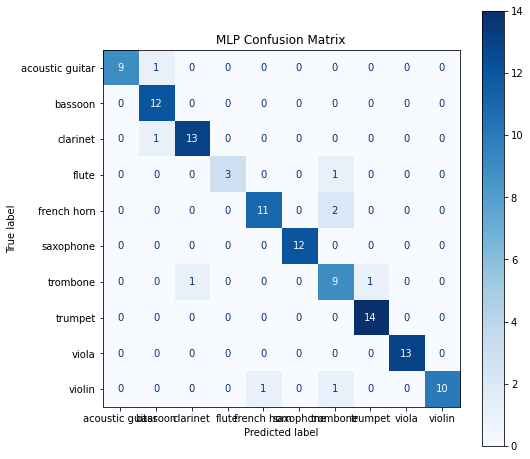

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))
disp = plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues, ax=ax)
disp.ax_.set_title('MLP Confusion Matrix')
plt.show()

In [48]:
# Predict random sample
idx = np.random.choice(len(filenames), 1)[0]
file = f'data/test_samples/{filenames[idx]}'
y, sr = librosa.load(file)
print(f'file: {file}')
ipd.display(ipd.Audio(file, rate=sr))
print('k-NN prediction: ', knn.predict([features[idx]]))
print('MLP prediction: ', clf.predict([features[idx]]))

/home/moo/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: 'data/test_samples/saxophone/saxophone_train5.wav'